In [3]:
import pandas as pd
level3_all = pd.read_pickle("/home/sgf2/DBMI_server/repo/mdeg_collab/data/lincs_level3_all_perts.pkl")

In [6]:
level3_all.head()

pr_gene_id                                                                                                                                                   16      \
pr_gene_symbol                                                                                                                                                 AARS   
cell_id cell_type primary_site subtype            pert_id       pert_name      pert_type   plate                    canonical_smiles pert_dose   pert_time            
A375    cell line skin         malignant melanoma DMSO          DMSO           ctl_vehicle REP.A001_A375_24H_X1_B22 CS(=O)C          -666@-666.0 24.0       10.7893   
                                                                                                                                                 24.0       10.3993   
                                                                                                                                                 24.0       10.1665   
                                                                                                                                                 24.0       10.4328   
                                                  BRD-K25114078 aminoguanidine trt_cp      REP.A001_A375_24H_X1_B22 NNC(N)=N         um@10.0     24.0       10.4366   

pr_gene_id                                                                                                                                                   23      \
pr_gene_symbol                                                                                                                                                ABCF1   
cell_id cell_type primary_site subtype            pert_id       pert_name      pert_type   plate                    canonical_smiles pert_dose   pert_time            
A375    cell line skin         malignant melanoma DMSO          DMSO           ctl_vehicle REP.A001_A375_24H_X1_B22 CS(=O)C          -666@-666.0 24.0        9.8857   
                                                                                                                                                 24.0        9.7710   
                                                                                                                                                 24.0       10.0645   
                                                                                                                                                 24.0        9.8359   
                                                  BRD-K25114078 aminoguanidine trt_cp      REP.A001_A375_24H_X1_B22 NNC(N)=N         um@10.0     24.0       10.1806   

pr_gene_id                                                                                                                                                  25      \
pr_gene_symbol                                                                                                                                                ABL1   
cell_id cell_type primary_site subtype            pert_id       pert_name      pert_type   plate                    canonical_smiles pert_dose   pert_time           
A375    cell line skin         malignant melanoma DMSO          DMSO           ctl_vehicle REP.A001_A375_24H_X1_B22 CS(=O)C          -666@-666.0 24.0       9.3293   
                                                                                                                                                 24.0       9.3663   
                                                                                                                                                 24.0       9.1392   
                                                                                                                                                 24.0       9.1712   
                                                  BRD-K25114078 aminoguanidine trt_cp      REP.A001_A375_24H_X1_B22 NNC(N)=N         um@10.0     24.0       9.4701  

In [33]:
#count_ctrls_by_plate = level3_all.groupby('plate').agg(lambda x: (x.index.get_level_values('pert_type') == 'ctl_vehicle').sum()).sort_values()
#count_ctrls_by_plate[1:10]

In [36]:
level3_all.index.get_level_values('pert_type').value_counts()

trt_cp         986550
ctl_vehicle     47721
ctl_vector      31014
trt_lig         25739
ctl_untrt       22333
trt_xpr         11421
Name: pert_type, dtype: int64

In [39]:
round_doses = [val.split('@')[0] + '@%s' % float('%.1g' % float(val.split('@')[1])) for val in level3_all.index.get_level_values('pert_dose').tolist()]

level3_all.index = pd.MultiIndex.from_arrays([level3_all.index.get_level_values('cell_id').to_list(),
                                                       level3_all.index.get_level_values('cell_type').to_list(),
                                                       level3_all.index.get_level_values('primary_site').to_list(),
                                                       level3_all.index.get_level_values('subtype').to_list(),
                                                       level3_all.index.get_level_values('pert_id').to_list(),
                                                       level3_all.index.get_level_values('pert_name').to_list(),
                                                       level3_all.index.get_level_values('pert_type').to_list(),
                                                       level3_all.index.get_level_values('plate').to_list(),
                                                       level3_all.index.get_level_values('canonical_smiles').to_list(),
                                                       round_doses,
                                                       level3_all.index.get_level_values('pert_time').to_list()
                                                      ],
                                                      names = ['cell_id', 'cell_type', 'primary_site', 'subtype', 'pert_id', 'pert_name', 'pert_type', 'plate', 'canonical_smiles', 'pert_dose', 'pert_time']
                                                     )

## Ranking Doses by Count

In [60]:
level3_all.index.get_level_values('pert_dose').value_counts()[0:10]

um@10.0        476219
um@5.0         117601
-666@-700.0     95223
um@0.4          69234
um@1.0          64340
um@3.0          61499
um@0.1          55097
um@0.04         54726
um@20.0         16786
um@2.0          16679
Name: pert_dose, dtype: int64

In [54]:
level3_all.query('pert_time == "24.0"').index.get_level_values('pert_dose').value_counts()[0:10]

um@10.0        239938
um@5.0          93541
um@0.4          59016
um@1.0          56261
um@3.0          55042
um@0.1          51437
um@0.04         51200
-666@-700.0     33131
um@20.0         13938
um@2.0           8368
Name: pert_dose, dtype: int64

In [55]:
level3_all.query('pert_time == "6.0"').index.get_level_values('pert_dose').value_counts()[0:10]

um@10.0        233675
um@5.0          23985
-666@-700.0     11788
um@2.0           8311
um@0.4           7805
um@1.0           5568
um@0.08          5031
um@3.0           4044
um@0.6           3959
um@0.2           3935
Name: pert_dose, dtype: int64

## Ranking Cell Types by Count

In [56]:
level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0"').index.get_level_values('cell_id').value_counts()[0:10]

PC3     42066
MCF7    36921
VCAP    32442
A549    17182
HA1E    14008
NPC     12717
A375    12361
HT29    11147
ASC      9425
SKB      7648
Name: cell_id, dtype: int64

In [57]:
level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0"').index.get_level_values('cell_id').value_counts()[0:10]

VCAP     27572
A549     16315
A375     14023
HT29     13254
MCF7     11805
PC3      10409
HA1E        85
PHH         15
HEPG2       15
NKDBA       15
Name: cell_id, dtype: int64

In [58]:
level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0"').index.get_level_values('cell_id').value_counts()[0:10]

PC3       32150
VCAP      31453
MCF7      29937
HT29      27163
A375      23924
HA1E      15612
A549      15559
HCC515    14782
HEPG2     12580
NEU        2266
Name: cell_id, dtype: int64

In [59]:
level3_all.query('pert_time == "6.0" & pert_dose == "um@5.0"').index.get_level_values('cell_id').value_counts()[0:10]

VCAP       22918
PC3          389
MCF7         306
HA1E         118
A375          76
HEPG2         18
A549          16
HUH7          15
PHH           15
NPC.TAK       12
Name: cell_id, dtype: int64

## Counting Unique Perts by Type

In [78]:
(
    level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "A549"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "HA1E"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "NPC"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "HT29"'). \
        index.get_level_values('pert_id').nunique() 
)

(8116, 7602, 6379, 5306, 3669, 3571, 3543, 3203)

In [79]:
(
    level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "A549"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "HT29"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').nunique() 
)

(9479, 7132, 5905, 5541, 4979, 4401)

In [80]:
(
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "HT29"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "HA1E"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "A549"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "HCC515"'). \
        index.get_level_values('pert_id').nunique() ,
    level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "HEPG2"'). \
        index.get_level_values('pert_id').nunique()
)

(6428, 6430, 6128, 5070, 5103, 4777, 5110, 4884, 3754)

In [68]:
level3_all.query('pert_time == "6.0" & pert_dose == "um@5.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').nunique()

8494

## Counting Replicated Experiments

### All three dose/durations

In [72]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').unique())
)

229

In [73]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').unique())
)

202

In [81]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').unique())
)

171

In [84]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique())
)

7

### 24/10 and 6/10

In [76]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').unique())
)

6385

In [77]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').unique())
)

6368

In [82]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').unique())
)

6099

In [85]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "6.0" & pert_dose == "um@10.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique())
)

1851

### 24/10 and 24/5

In [74]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "PC3"'). \
        index.get_level_values('pert_id').unique())
)

578

In [75]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "VCAP"'). \
        index.get_level_values('pert_id').unique())
)

202

In [83]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "MCF7"'). \
        index.get_level_values('pert_id').unique())
)

531

In [86]:
len(
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@10.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique()) & \
    set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique())
)

422

### A375

In [95]:
(
    len(
        set(level3_all.query('pert_time == "24.0" & pert_dose == "um@5.0" & cell_id == "A375"'). \
            index.get_level_values('pert_id').unique())
    ), 
    len(
        set(level3_all.query('pert_time == "24.0" & pert_dose == "um@3.0" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique())
    ),
    len(
        set(level3_all.query('pert_time == "24.0" & pert_dose == "um@0.6" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique())
    ),
    len(
        set(level3_all.query('pert_time == "24.0" & pert_dose == "um@0.1" & cell_id == "A375"'). \
        index.get_level_values('pert_id').unique())
    )
)

(5905, 1809, 70, 1808)

In [126]:
train_test_seed = 17

## Dataset

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
pert_time = "24.0"
pert_dose = "um@10.0"
cell_id = "PC3"
train_test_seed = 17
split = 'train'
rankTransform = False

l1000_perts = level3_all.query('pert_time == @pert_time ' + \
                 '& pert_dose == @pert_dose ' + \
                 '& cell_id == @cell_id')
l1000_perts_plates = list(set(l1000_perts.index.get_level_values('plate').values))

l1000_controls = level3_all.query('pert_time == @pert_time' + \
                 '& cell_id == @cell_id ' + \
                 '& pert_type in ["ctl_vehicle", "ctl_vector", "ctl_untrt"] ' + \
                 '& plate in @l1000_perts_plates')

plates_train, plates_non_train = train_test_split(l1000_perts_plates, test_size=0.2, random_state=train_test_seed)
plates_val, plates_test = train_test_split(plates_non_train, test_size=0.5, random_state=train_test_seed)

if split == 'train':
    l1000_perts = l1000_perts.query('plate in @plates_train')
    l1000_controls = l1000_controls.query('plate in @plates_train')
elif split == 'val':
    l1000_perts = l1000_perts.query('plate in @plates_val')
    l1000_controls = l1000_controls.query('plate in @plates_val')
else:
    l1000_perts = l1000_perts.query('plate in @plates_test')
    l1000_controls = l1000_controls.query('plate in @plates_test')

if rankTransform:
# uniform between 0 and 1.  Can consider other ranges
    l1000_perts_plates = (l1000_perts_plates.rank(axis = 1) - 1 ) / (l1000_perts_plates.shape[1] - 1)
    if control_sigs is not None:
        l1000_controls = (l1000_controls.rank(axis = 1) - 1 ) / (l1000_controls.shape[1] - 1)
        

In [7]:
perts_train = set(l1000_perts.query('plate in @plates_train').index.get_level_values("pert_id"))
perts_val = set(l1000_perts.query('plate in @plates_val').index.get_level_values("pert_id"))
perts_test = set(l1000_perts.query('plate in @plates_test').index.get_level_values("pert_id"))

print("Unique perts in train:", len(perts_train), '\n',
      "Unique perts in val:", len(perts_val), '\n',
      "Unique perts in test:", len(perts_test), '\n\n',
      "Intersect train/val:", len(perts_train & perts_val),'\n',
      "Intersect train/test:", len(perts_train & perts_test),'\n',
      "Intersect val/test:", len(perts_val & perts_test),'\n',
      "Intersect train/val/test:", len(perts_train & (perts_val & perts_test)),'\n',
      "Intersect train/(val or test):", len(perts_train & (perts_val | perts_test))
)

Unique perts in train: 6677 
 Unique perts in val: 0 
 Unique perts in test: 0 

 Intersect train/val: 0 
 Intersect train/test: 0 
 Intersect val/test: 0 
 Intersect train/val/test: 0 
 Intersect train/(val or test): 0


## Test Data Loader

In [195]:
from drug_repo_metric_learning.lincs_joint_embed_datasets import LincsTripletDataset, LincsContrastiveDataset, LincsQuadrupletDataset, LincsQuintupletDataset

In [194]:
np.log(10000/2)

8.517193191416238

In [196]:
triplet_data = LincsTripletDataset(level3_all)
triplet_data.__getitem__(1)

(tensor([[ 0.3594, -0.1243,  0.6475,  ..., -0.5375, -0.9292, -0.5652],
         [ 0.3038, -0.4379,  0.2635,  ..., -0.9006, -0.6435, -0.6162],
         [-0.0556, -0.3136, -0.3840,  ..., -0.3631,  0.2857, -0.0509],
         [-0.0062, -0.0481, -0.0777,  ..., -0.0650,  0.0648, -0.0182]]),
 'CN(C(=O)Cc1ccc(cc1)-c1ccccn1)c1nc(C)c(s1)S(N)(=O)=O',
 'CCOc1cc(N)c(Cl)cc1C(=O)NCC1CN(Cc2ccc(F)cc2)CCO1')

In [189]:
LincsTripletDataset(level3_all, output_type="triplet_ge_only").__getitem__(1)

(tensor([[-0.3909, -0.0849,  0.6752,  ..., -0.7487, -1.0891, -0.5070],
         [ 0.3038, -0.4379,  0.2635,  ..., -0.9006, -0.6435, -0.6162],
         [ 0.6947, -0.3530, -0.4117,  ..., -0.1519,  0.4456, -0.1092],
         [    nan,  2.3674, -1.3573,  ...,  0.2665, -0.7592,  0.2814]]),
 tensor([[-0.3837, -0.4735,  0.3270,  ..., -0.5354, -0.7610, -0.0540],
         [-0.4989, -0.8259,  0.4173,  ..., -0.6507, -0.7765,  0.1433],
         [-0.1152, -0.3524,  0.0903,  ..., -0.1153, -0.0155,  0.1973],
         [ 0.3787,  0.8026,  0.3520,  ...,  0.2814,  0.0290,     nan]]),
 tensor([[ 0.6037,  0.2491,  1.2633,  ...,  0.7622, -0.3320, -0.4770],
         [ 0.3600,  0.0219,  1.0378,  ..., -0.1239, -0.8234, -0.4216],
         [-0.2436, -0.2271, -0.2256,  ..., -0.8861, -0.4914,  0.0553],
         [-0.7456, -3.5055, -0.2838,  ...,     nan,  1.3104, -0.1779]]))

In [190]:
LincsTripletDataset(level3_all, output_type="triplet_chem_first").__getitem__(1)

('CN(C(=O)Cc1ccc(cc1)-c1ccccn1)c1nc(C)c(s1)S(N)(=O)=O',
 tensor([[ 0.1168, -0.1164,  0.6352,  ..., -0.7263, -1.0795, -0.6691],
         [ 0.3038, -0.4379,  0.2635,  ..., -0.9006, -0.6435, -0.6162],
         [ 0.1870, -0.3215, -0.3716,  ..., -0.1743,  0.4360,  0.0530],
         [ 1.3790,  1.9112, -1.2692,  ...,  0.3103, -0.7463, -0.1189]]),
 tensor([[ 0.0733,  0.2585, -0.2472,  ..., -0.2143, -0.5006,  0.4127],
         [-0.2338, -1.4132, -0.1979,  ..., -0.3786, -0.3962, -1.1280],
         [-0.3070, -1.6716,  0.0493,  ..., -0.1643,  0.1044, -1.5406],
         [    nan,     nan, -0.3207,  ...,  0.8209, -0.3374,     nan]]))

In [197]:
LincsContrastiveDataset(level3_all).__getitem__(1)

((tensor([[ 0.0211, -0.1855,  0.4829,  ..., -1.0891, -1.0113, -0.2061],
          [ 0.3038, -0.4379,  0.2635,  ..., -0.9006, -0.6435, -0.6162],
          [ 0.2827, -0.2524, -0.2194,  ...,  0.1885,  0.3678, -0.4101],
          [ 0.0318, -0.0388, -0.0449,  ...,  0.0350,  0.0840, -0.1406]]),
  'CN(C(=O)Cc1ccc(cc1)-c1ccccn1)c1nc(C)c(s1)S(N)(=O)=O'),
 tensor([1.]))

In [198]:
LincsContrastiveDataset(level3_all, output_type="contrastive_ge_only").__getitem__(1)

((tensor([[ 0.1168, -0.1164,  0.6352,  ..., -0.7263, -1.0795, -0.6691],
          [ 0.3038, -0.4379,  0.2635,  ..., -0.9006, -0.6435, -0.6162],
          [ 0.1870, -0.3215, -0.3716,  ..., -0.1743,  0.4360,  0.0530],
          [ 0.0210, -0.0493, -0.0753,  ..., -0.0316,  0.1001,  0.0192]]),
  tensor([[-0.1911, -0.7857, -0.0648,  ..., -0.9974,  0.4661,  0.7026],
          [ 0.2262, -0.3508, -0.2596,  ..., -1.6568, -0.5579,  1.4546],
          [ 0.4172,  0.4349, -0.1948,  ..., -0.6594, -1.0240,  0.7519],
          [ 0.0475,  0.0688, -0.0432,  ..., -0.1278, -0.2084,  0.1906]])),
 tensor([0.]))

In [199]:
LincsQuadrupletDataset(level3_all).__getitem__(1)

(tensor([[ 0.3594, -0.1243,  0.6475,  ..., -0.5375, -0.9292, -0.5652],
         [ 0.3038, -0.4379,  0.2635,  ..., -0.9006, -0.6435, -0.6162],
         [-0.0556, -0.3136, -0.3840,  ..., -0.3631,  0.2857, -0.0509],
         [-0.0062, -0.0481, -0.0777,  ..., -0.0650,  0.0648, -0.0182]]),
 tensor([[ 2.7457,  1.6533,  0.1713,  ..., -0.5455,  0.2043,  1.8991],
         [ 1.7237,  2.6401,  0.5464,  ...,  1.3072,  0.5272,  2.5659],
         [-1.0220,  0.9868,  0.3751,  ...,  1.8527,  0.3229,  0.6668],
         [-0.0991,  0.1204,  0.0770,  ...,  0.2930,  0.0620,  0.1405]]),
 'CN(C(=O)Cc1ccc(cc1)-c1ccccn1)c1nc(C)c(s1)S(N)(=O)=O',
 'CCn1c2nc(N)nc(C)c2cc(-c2cc[nH]n2)c1=O')

In [200]:
LincsQuintupletDataset(level3_all).__getitem__(1)

(tensor([[ 0.1413, -0.2887,  0.5510,  ..., -1.0273, -1.1003, -0.5484],
         [ 0.3038, -0.4379,  0.2635,  ..., -0.9006, -0.6435, -0.6162],
         [ 0.1625, -0.1492, -0.2875,  ...,  0.1267,  0.4569, -0.0678],
         [ 0.0182, -0.0231, -0.0586,  ...,  0.0234,  0.1051, -0.0242]]),
 tensor([[ 6.2992e-02, -3.4057e-01,  4.8246e-01,  ..., -9.3865e-01,
          -1.3867e+00, -5.6204e-02],
         [-2.4216e-01, -3.3741e-01,  6.9616e-01,  ..., -5.5099e-01,
          -1.0589e+00, -1.8607e-01],
         [-3.0515e-01,  3.1648e-03,  2.1369e-01,  ...,  3.8766e-01,
           3.2778e-01, -1.2986e-01],
         [-3.5036e-02,  4.8835e-04,  4.2461e-02,  ...,  6.9664e-02,
           7.9850e-02, -4.1628e-02]]),
 tensor([[-0.4842, -0.3418, -0.2264,  ..., -0.5703,  0.4064, -0.3682],
         [ 0.6145,  0.3465, -0.1834,  ..., -0.1154,  0.5123,  0.5456],
         [ 1.0987,  0.6884,  0.0430,  ...,  0.4549,  0.1059,  0.9138],
         [ 0.1247,  0.1025,  0.0096,  ...,  0.0779,  0.0201,  0.2807]]),
 'CN(C

In [15]:
from scipy.spatial.distance import cdist, pdist
import time

Seconds elapsed:  26.688403367996216


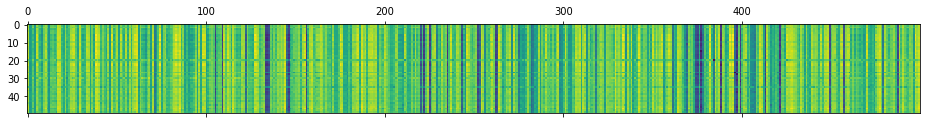

Seconds elapsed:  0.14568114280700684


In [136]:
t0 = time.time()

pert_avg = quadruplet_data.l1000_perts.groupby('pert_id').mean()
test_perts = quadruplet_data.l1000_perts.iloc[0:5000,:]
test_perts.index = test_perts.index.get_level_values('pert_id')

pert_corrs = 1 - cdist(test_perts, pert_avg, metric = 'correlation')

t1 = time.time()
print("Seconds elapsed: ", t1-t0)

plt.matshow(cdistances)
plt.show()

t2 = time.time()
print("Seconds elapsed: ", t2-t1)

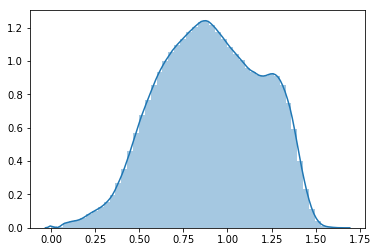

In [30]:
sns.distplot(1 - np.array(pert_corrs)[np.triu_indices(pert_corrs.shape[0], m=pert_corrs.shape[1])])

## Load chemprop test

In [4]:
import torch
import sys
sys.path.append('../chemprop')
#from chemprop.features.featurization import *
#from chemprop.features.features_generators import *
from chemprop.models.model import build_model
#from chemprop.utils import load_checkpoint

#from descriptastorus.descriptors import rdNormalizedDescriptors

In [89]:
chemprop_info = torch.load("../chemprop/pcba/model_unoptimized.pt")
chemprop_model = build_model(chemprop_info['args'])
chemprop_model.load_state_dict(chemprop_info['state_dict'])
chemprop_encoder = chemprop_model.encoder
chemprop_encoder.cuda()

smiles_list = ['CN(C(=O)Cc1ccc(cc1)-c1ccccn1)c1nc(C)c(s1)S(N)(=O)=O','COc1cc2nccc(Oc3ccc(NC(=O)C4(CC4)C(=O)Nc4ccc(F)cc4)cc3)c2cc1OC']
output_encoder = chemprop_encoder(smiles_list)
print(output_encoder.shape)

torch.Size([2, 300])


In [15]:
chemprop_model

MoleculeModel(
  (sigmoid): Sigmoid()
  (encoder): MPN(
    (encoder): MPNEncoder(
      (dropout_layer): Dropout(p=0.0)
      (act_func): ReLU()
      (W_i): Linear(in_features=147, out_features=300, bias=False)
      (W_h): Linear(in_features=300, out_features=300, bias=False)
      (W_o): Linear(in_features=433, out_features=300, bias=True)
    )
  )
  (ffn): Sequential(
    (0): Dropout(p=0.0)
    (1): Linear(in_features=300, out_features=300, bias=True)
    (2): ReLU()
    (3): Dropout(p=0.0)
    (4): Linear(in_features=300, out_features=128, bias=True)
  )
)

In [11]:
#chemprop_info = torch.load("../chemprop/pcba/model_unoptimized.pt")
#chemprop_model = build_model(chemprop_info['args'])
#chemprop_model.load_state_dict(chemprop_info['state_dict'])

chemprop_model = load_checkpoint("../chemprop/pcba/model_unoptimized.pt", cuda=True)

chemprop_encoder = chemprop_model.encoder
chemprop_encoder.cuda(); chemprop_model.cuda();

smiles_list = ['CN(C(=O)Cc1ccc(cc1)-c1ccccn1)c1nc(C)c(s1)S(N)(=O)=O','COc1cc2nccc(Oc3ccc(NC(=O)C4(CC4)C(=O)Nc4ccc(F)cc4)cc3)c2cc1OC']


output_encoder = chemprop_encoder(smiles_list)
print(output_encoder.shape)

output_ffn = chemprop_model.ffn(output_encoder)
print(output_ffn.shape)

output_full_model = chemprop_model(smiles_list)
print(bool(torch.all(torch.eq(output_full_model, output_ffn))))
print(output_full_model[0][1:10])
print(output_ffn[0][1:10])

Loading pretrained parameter "encoder.encoder.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.W_i.weight".
Loading pretrained parameter "encoder.encoder.W_h.weight".
Loading pretrained parameter "encoder.encoder.W_o.weight".
Loading pretrained parameter "encoder.encoder.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda
torch.Size([2, 300])
torch.Size([2, 128])
True
tensor([-12.6297, -15.3627, -10.7507,  -9.2732,  -4.9701, -10.0389,  -9.3424,
        -12.5157, -15.1309], device='cuda:0', grad_fn=<SliceBackward>)
tensor([-12.6297, -15.3627, -10.7507,  -9.2732,  -4.9701, -10.0389,  -9.3424,
        -12.5157, -15.1309], device='cuda:0', grad_fn=<SliceBackward>)


## Test

In [14]:
import pandas as pd
level3_all = pd.read_pickle("/home/sgf2/DBMI_server/repo/mdeg_collab/data/lincs_level3_all_perts.pkl")

In [15]:
import torch
from torch.utils.data import DataLoader

In [16]:
%load_ext autoreload
%autoreload 2

### Triplet

In [208]:
from drug_repo_metric_learning.lincs_joint_embed_datasets import LincsTripletDataset
from drug_repo_metric_learning.lincs_joint_embed_models import FeedForwardTripletNet, load_chemprop_model
from drug_repo_metric_learning.lincs_joint_embed_losses import TripletMarginLoss_WU

In [209]:
triplet_data = LincsTripletDataset(level3_all)
dl = DataLoader(triplet_data, batch_size=512, shuffle=True)
batch = next(iter(dl))
fft = FeedForwardTripletNet()

In [210]:
loss_func_wu = TripletMarginLoss_WU()
anchors, positives, negatives = fft(batch)
loss_func_wu(anchors, positives, negatives)

(tensor(11.8598, device='cuda:0', grad_fn=<DivBackward0>), 49.8046875)

In [5]:
loss_func_wu = TripletMarginLoss_WU(percent_correct=True)
loss_func_wu(*fft(batch))

(tensor(11.7908, device='cuda:0', grad_fn=<DivBackward0>), 52.1484375)

In [214]:
from types import SimpleNamespace

configs = SimpleNamespace(device_num = 3, # e.g None or an integer
    rankTrans = False,
    batch_size = 512,
    structure = "triplet", #'quadruplet' or "triplet"
    dropout_prob = 0, #0.5
    val_mode_at_val = True,
               )
configs.device_num

3

### Singlet wrappers

In [17]:
from drug_repo_metric_learning.lincs_joint_embed_datasets import LincsSingletGEWrapperDataset, LincsSingletSmilesWrapperDataset
import numpy

In [25]:
train_dataset = LincsTripletDataset(level3_all)
val_dataset = LincsTripletDataset(level3_all, split="val")

In [59]:
next(iter(ge_loader))[0]

tensor([[ 1.6076e-02, -1.7589e-01,  4.9772e-01,  ..., -2.6412e-02,
          3.0552e-02,  4.0258e-02],
        [ 6.8521e-02,  4.0949e-03,  5.8939e-01,  ...,  1.3115e-02,
          2.7382e-02, -5.5072e-02],
        [-2.3921e-01, -3.5431e-01,  5.6698e-01,  ...,  9.0626e-02,
          8.4407e-02,  3.6836e-03],
        ...,
        [ 1.0363e+00, -2.1373e-01, -6.0398e-01,  ...,  1.1944e-03,
          3.0637e-02,  4.8950e-02],
        [ 1.2469e+00, -2.8921e-01, -3.8727e-01,  ..., -3.0655e-02,
          9.9182e-02, -2.1144e-02],
        [ 9.9444e-01, -2.1046e-01, -6.6450e-01,  ...,  2.0494e-02,
          5.7921e-03,  8.0258e-02]])

In [51]:
batch_size=512

ge_wrapper_train = LincsSingletGEWrapperDataset(train_dataset)
ge_wrapper_val = LincsSingletGEWrapperDataset(val_dataset)
smiles_wrapper_train = LincsSingletSmilesWrapperDataset(train_dataset)
smiles_wrapper_val = LincsSingletSmilesWrapperDataset(val_dataset)

ge_loader_train = DataLoader(ge_wrapper_train, batch_size=batch_size*3, shuffle=False)
ge_loader_val = DataLoader(ge_wrapper_val, batch_size=batch_size*3, shuffle=False)
smiles_loader_train = DataLoader(smiles_wrapper_train, batch_size=batch_size*3, shuffle=False)
smiles_loader_val = DataLoader(smiles_wrapper_val, batch_size=batch_size*3, shuffle=False)

In [46]:
gex_embeddings[,:]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [57]:
ge_wrapper = ge_wrapper_val
ge_loader = ge_loader_val
smiles_wrapper = smiles_wrapper_val
smiles_loader = smiles_loader_val

In [163]:
gex_embeddings = np.zeros([ge_wrapper.__len__(), model.embed_size])
smiles_gex_labels = []
chem_embeddings = np.zeros([smiles_wrapper.__len__(), model.embed_size])
#smiles_strings = smiles_wrapper.pert_smiles

with torch.no_grad():
    for i, batch in enumerate(ge_loader):
        gex = batch[0].cuda()
        start_ind = i * ge_loader.batch_size
        end_ind = start_ind + gex.shape[0]
        
        smiles_gex_labels.extend(batch[1])
        gex_embeddings[start_ind:end_ind,:] = model.ge_embed(gex).cpu().numpy()
        
    for i, batch in enumerate(smiles_loader):
        smiles = batch
        start_ind = i * smiles_loader.batch_size
        end_ind = start_ind + len(smiles)
        
        chem_embeds = model.chem_linear(model.chemprop_encoder(smiles))
        chem_embeddings[start_ind:end_ind,:] = chem_embeds.cpu().numpy()
        
gex_chem_distances = cdist(gex_embeddings, smiles_embeddings, metric='euclidean')
gex_chem_ranks = rankdata(gex_chem_distances, axis = 1)

rank_first_match = []
rank_all_matches = []
for i,sml in enumerate(smiles_gex_labels):
    matches = np.where(smiles_wrapper.pert_smiles == sml)[0]
    ranks_matches = gex_chem_ranks[i,matches]
    rank_all_matches.append(ranks_matches)
    rank_first_match.append(np.min(ranks_matches))

rank_first_match = np.array(rank_first_match)
mean_rank_first = np.mean(rank_first_match)
mrr = np.mean(1/rank_first_match)

hits_at_10 = np.mean([np.sum(results <= 10) for results in rank_all_matches])
hits_at_100 = np.mean([np.sum(results <= 100) for results in rank_all_matches])
hits_at_500 = np.mean([np.sum(results <= 500) for results in rank_all_matches])

 {
    "mean_rank": mean_rank_first,
    "mrr": mrr,
    "H@10": hits_at_10,
    "H@100": hits_at_100,
    "H@500": hits_at_500
}

{'mean_1st_rank': 1369.8714445064138,
 'mrr': 0.5019682830730722,
 'H@10': 0.0039040713887339654,
 'H@100': 0.03234802007808143,
 'H@500': 0.18014500836586725}

In [223]:
print(config)

namespace(batch_size=512, device_num=3, dropout_prob=0, log_path='logs/exp1.log', rankTrans=False, structure='triplet', val_mode_at_val=True)


In [ ]:
train_dataset.pert_names

In [195]:
[x for x in rank_all_matches if (len(x)>1)]

[array([1827., 2082.]),
 array([1795.,  833.]),
 array([1703.,  392.]),
 array([1220., 1884.])]

In [207]:
a = list(train_dataset.pert_smiles)
import collections
dups = [item for item, count in collections.Counter(a).items() if count > 1]

for i,sm in enumerate(train_dataset.pert_smiles):
    if sm in dups:
        print(train_dataset.pert_names[i], train_dataset.pert_smiles[i])

BRD-A22032524 CCOC(=O)C1=C(NC(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)COCCN
BRD-A64297288 CCOC(=O)C1=C(NC(=C(C1C2=CC=CC=C2Cl)C(=O)OC)C)COCCN
BRD-A82307304 CC(C)c1c(C(=O)Nc2ccccc2)c(c(-c2ccc(F)cc2)n1CCC(O)CC(O)CC(O)=O)-c1ccccc1
BRD-A83892713 CO[C@H]1\C=C\O[C@@]2(C)Oc3c(C2=O)c2c(O)c(\C=N\N4CCN(C)CC4)c(NC(=O)\C(C)=C/C=C/[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C)c(O)c2c(O)c3C
BRD-K01507359 CO[C@H]1\C=C\O[C@@]2(C)Oc3c(C2=O)c2c(O)c(\C=N\N4CCN(C)CC4)c(NC(=O)\C(C)=C/C=C/[C@H](C)[C@H](O)[C@@H](C)[C@@H](O)[C@@H](C)[C@H](OC(C)=O)[C@@H]1C)c(O)c2c(O)c3C
BRD-K10916986 CCC1=C[C@@H]2C[N@](C1)Cc1c([nH]c3ccccc13)[C@@](C2)(C(=O)OC)c1cc2c(cc1OC)N(C)[C@@H]1[C@]22CCN3CC=C[C@@](CC)([C@@H]23)[C@@H](OC(C)=O)[C@]1(O)C(=O)OC
BRD-K19687926 CS(=O)(=O)CCNCc1ccc(o1)-c1ccc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2c1
BRD-K42828737 CCN(CC)CCNC(=O)c1c(C)[nH]c(\C=C2/C(=O)Nc3ccc(F)cc23)c1C
BRD-K54006094 COc1ccc(C[C@H](C)NC[C@@H](O)c2ccc(O)c(NC=O)c2)cc1
BRD-K84748119 COC[C@H](N1CCN(C[C@@H]1C)C1(C)CCN(CC1)C(=O)c1c(C

In [175]:
"    ".join(['{}: {:.3f}'.format(k,metrics_res[k]) for k in metrics_res])

'mean_1st_rank: 1369.871    mrr: 0.502    H@10: 0.004    H@100: 0.032    H@500: 0.180'

In [168]:
[k for k in metrics_res]

['mean_1st_rank', 'mrr', 'H@10', 'H@100', 'H@500']

In [148]:
rank_first_match = []
rank_all_matches = []
for i,sml in enumerate(smiles_gex_labels):
    matches = np.where(smiles_wrapper.pert_smiles == sml)[0]
    ranks_matches = gex_chem_ranks[i,matches]
    rank_all_matches.append(ranks_matches)
    rank_first_match.append(np.min(ranks_matches))

rank_first_match = np.array(rank_first_match)

mean_rank_first = np.mean(rank_first_match)
mrr = np.mean(rank_first_match / gex_chem_distances.shape[1])

hits_at_10 = np.mean([np.sum(results < 10) for results in rank_all_matches])
hits_at_100 = np.mean([np.sum(results < 100) for results in rank_all_matches])
hits_at_500 = np.mean([np.sum(results < 500) for results in rank_all_matches])
hits_at_1000 = np.mean([np.sum(results < 1000) for results in rank_all_matches])

In [161]:
np.mean([np.sum(results < 1000) for results in rank_all_matches])

0.3792526491912995

In [130]:
np.sum(smiles_wrapper.pert_smiles == 'CS(=O)(=O)CCNCc1ccc(o1)-c1ccc2ncnc(Nc3ccc(OCc4cccc(F)c4)c(Cl)c3)c2c1')

2

In [147]:
gex_chem_ranks[i,np.array([1297, 261])]

array([2729., 1056.])

In [145]:
np.mean(min_rank < 5)

0.0011154489682097045

In [101]:
gex_embeddings.shape, smiles_embeddings.shape, cdist(gex_embeddings, smiles_embeddings, metric='euclidean').shape

((3586, 128), (2729, 128), (3586, 2729))

### Quad

In [44]:
from drug_repo_metric_learning.lincs_joint_embed_datasets import LincsQuadrupletDataset
from drug_repo_metric_learning.lincs_joint_embed_models import FeedForwardQuadrupletNet, load_chemprop_model
from drug_repo_metric_learning.lincs_joint_embed_losses import QuadrupletMarginLoss

In [45]:
quad_data = LincsQuadrupletDataset(level3_all)
dlq = DataLoader(quad_data, batch_size=512, shuffle=True)
batch = next(iter(dlq))
quadnet = FeedForwardQuadrupletNet()

NameError: name 'DataLoader' is not defined

In [47]:
dlq = DataLoader(quad_data, batch_size=512, shuffle=True)
batch = next(iter(dlq))
quadnet = FeedForwardQuadrupletNet()
loss_func_quad = QuadrupletMarginLoss()
loss_func_quad(*quadnet(batch))

(tensor(23.4854, device='cuda:0', grad_fn=<AddBackward0>),
 (53.515625, 53.3203125))

In [9]:
loss_func_quad = QuadrupletMarginLoss(percent_correct=True)
loss_func_quad(*quadnet(batch))

(tensor(23.6352, device='cuda:0', grad_fn=<AddBackward0>),
 (52.5390625, 51.953125))

### Quintuplet

In [10]:
from drug_repo_metric_learning.lincs_joint_embed_datasets import LincsQuintupletDataset
from drug_repo_metric_learning.lincs_joint_embed_models import FeedForwardQuintupletNet, load_chemprop_model
from drug_repo_metric_learning.lincs_joint_embed_losses import QuintupletMarginLoss

In [11]:
quin_data = LincsQuintupletDataset(level3_all)
dlquin = DataLoader(quin_data, batch_size=512, shuffle=True)
batch = next(iter(dlquin))
quinnet = FeedForwardQuintupletNet()

In [12]:
loss_func_quin = QuintupletMarginLoss()
loss_func_quin(*quinnet(batch))

tensor(35.9932, device='cuda:0', grad_fn=<AddBackward0>)

In [13]:
loss_func_quin = QuintupletMarginLoss(percent_correct=True)
loss_func_quin(*quinnet(batch))

(tensor(36.0468, device='cuda:0', grad_fn=<AddBackward0>),
 (48.4375, 48.4375, 47.0703125))

In [15]:
loss_func_quin(*quinnet(batch))[0].item()

35.97899627685547

## Debug

In [3]:
import os
os.getcwd()

'/home/sgf2/Dropbox (HMS)/DBMI_server/repo/drug_repo_metric_learning'

In [1]:
import sys
sys.path.append('drug_repo_metric_learning/')

from lincs_joint_embed_datasets import LincsTripletDataset
from lincs_joint_embed_models import FeedForwardTripletNet
from lincs_joint_embed_losses import TripletMarginLoss_WU

import torch
from torch.utils.data import DataLoader
from ignite.engine import Events, create_supervised_trainer, create_supervised_evaluator
from ignite.metrics import Loss, RunningAverage
from ignite.contrib.handlers import tqdm_logger

from ignite.engine import Engine, Events
from ignite.handlers import ModelCheckpoint, Timer
from ignite.metrics import RunningAverage

import pandas as pd


In [10]:
import torch
import sys
sys.path.append('/home/sgf2/DBMI_server/repo/chemprop')
from chemprop.models.model import build_model
chemprop_info = torch.load("/home/sgf2/DBMI_server/repo/chemprop/pcba/model_unoptimized.pt")

chemprop_model = build_model(chemprop_info['args'])
chemprop_model.load_state_dict(chemprop_info['state_dict'])
chemprop_encoder = chemprop_model.encoder

In [2]:
device = torch.device('cuda:2')

In [4]:
chemprop_info = torch.load("/home/sgf2/DBMI_server/repo/chemprop/pcba/model_unoptimized.pt")


In [1]:
import datetime

In [185]:
from datetime import datetime as dt
from pytz import timezone
fmt = "%Y-%m-%d %H:%M:%S %Z%z"
now_time = datetime.now(timezone('US/Eastern'))
print("Current time: {}".format(now_time.strftime(fmt)))

Current time: 2019-07-03 16:35:16 EDT-0400


## Train test split

In [367]:
pert_time="24.0"
pert_dose = "um@10.0"
cell_id = "PC3"

nan = np.nan
l1000_perts = level3_all.query('pert_time == @pert_time ' +
                                       '& pert_dose == @pert_dose ' +
                                       '& cell_id in @cell_id ' +
                                       '& pert_type == "trt_cp" ' +
                                       '& canonical_smiles not in ["-666", "restricted", @nan] ')
l1000_perts_plates = sorted(set(l1000_perts.index.get_level_values('plate').values))

In [468]:
#for train_test_seed in range(300, 600): #370, 248, 85, 99, 169, 178, 183, 196, 205, 212
    
from sklearn.model_selection import train_test_split

train_test_seed = 0
val_not_train = 0
test_not_train = 0
test_not_val = 0

#for train_test_seed in [370, 248, 85, 99, 169, 178, 183, 196, 205, 212]:
for train_test_seed in [392, 638, 513, 559, 444, 50, 102, 194, 317, 579, 664, 836]:
#for train_test_seed in range(800, 900):
    # Train-test split by plate
    plates_train, plates_non_train = train_test_split(l1000_perts_plates, test_size=0.4,
                                                      random_state=train_test_seed)
    plates_val, plates_test = train_test_split(plates_non_train, test_size=0.5,
                                               random_state=train_test_seed)

    l1000_perts_train = set(l1000_perts.query('plate in @plates_train').index.get_level_values('canonical_smiles').unique())
    l1000_perts_val = set(l1000_perts.query('plate in @plates_val').index.get_level_values('canonical_smiles').unique())
    l1000_perts_test = set(l1000_perts.query('plate in @plates_test').index.get_level_values('canonical_smiles').unique())

    val_not_train = np.sum([x not in l1000_perts_train for x in l1000_perts_val])
    test_not_train = np.sum([x not in l1000_perts_train for x in l1000_perts_test])

    print(train_test_seed, val_not_train, test_not_train)

392 695 684
638 658 648
513 669 538
559 624 599
444 561 552
50 561 589
102 546 542
194 522 555
317 501 497
579 599 602
664 513 500
836 591 554


In [377]:
import json
def read_json(fname):
    with fname.open('rt') as handle:
        return json.load(handle, object_hook=OrderedDict)

def write_json(content, fname):
    with fname.open('wt') as handle:
        json.dump(content, handle, indent=4, sort_keys=False)

AttributeError: 'str' object has no attribute 'open'

In [444]:
import commentjson as json
from collections import OrderedDict
def read_json(fname):
    with open(fname, 'rt') as handle:
        return json.load(handle, object_hook=OrderedDict)

def write_json(content, fname):
    with open(fname, 'wt') as handle:
        json.dump(content, handle, indent=4, sort_keys=False)

In [454]:
config = read_json('drug_repo_metric_learning/experiments/triplet_ge_first_test/config_train.json')
config["loss"]["online_eval_metrics"]

['loss', 'percent_correct']

In [440]:
def initialize_from_config(config, name, module, *args, **kwargs):
    module_name = config[name]['type']
    module_args = dict(config[name]['args'])
    return getattr(module, module_name)(*args, **kwargs, **module_args)

In [399]:
def initialize(self, name, module, *args, **kwargs):
    """
    finds a function handle with the name given as 'type' in config, and returns the 
    instance initialized with corresponding keyword args given as 'args'.
    """
    module_name = self[name]['type']
    module_args = dict(self[name]['args'])
    #assert all([k not in module_args for k in kwargs]), 'Overwriting kwargs given in config file is not allowed'
    #module_args.update(kwargs)
    return getattr(module, module_name)(*args, **module_args)

In [447]:
initialize_from_config(config, 'optimizer', torch.optim, model.parameters())

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0003
    weight_decay: 0
)

In [449]:
import drug_repo_metric_learning.datasets as dr_datasets
val_dataset = initialize(config, 'dataset', dr_datasets,split="val")

In [451]:
config['loss']['monitoring_metrics']

['loss', 'percent_correct']